In [ ]:
#introduction to machine learning
#Algorithms, models that hel computer to learn and predict
#Applications of machine learning
"""summary
1.image processing
2. speech recognition
3.fraud detection

Approaches to machine learning
1. supervised learning: data set that is labeled,predict, linear regression, decision tree, support vector machine, neural network
2. unsupervised learning: unlabeled data, clustering algorithm to group data together,k-means clustering, hierarchical clustering,
PCA(pricipal component analysis)
3.Reinforcement Learning

problem formulation:
1. define the problem! classification task, regression analysis, clustering, anomaly detection recommendations.
2. gather the data
3. split the data

Data type:
categories of data:
1.Numerical data can be discrete(integer) or continuous(infinite values).
2. categorical data:can be measured against each other
3. ordinal data: measure against each other
"""

In [1]:
import numpy as np # linear regression
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting /data visualization
import seaborn as sns #statistical data visualisation
%matplotlib inline 
#ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# control
pd.options.display.max_columns=50
sns.set(style="darkgrid",rc={'axes.facecolor':'#CAF1DE'})
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
"""
cp= chest pain
trestbs = resting blood pressure
chol = cholesterol
fbs = fasting blood sugar
restecg = resting electrocardiography
exang =exercise induced agina
oldpeak = ST depression induced 
slope = the slope of the peak exercise
ca = number of major vessel
thal = normal,fexied defect, reversible defect
"""

In [3]:
#show number of people with heart diseases
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
#show percentage of male and female
count_female = len(df[df.sex==0])
count_male = len(df[df.sex==1])
#show output
print('percentage of female patients:{:.2f}'.format(count_female/(len(df.sex))*100))
print('percentage of male patients:{:.2f}'.format(count_male/(len(df.sex))*100))


percentage of female patients:30.44
percentage of male patients:69.56


In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


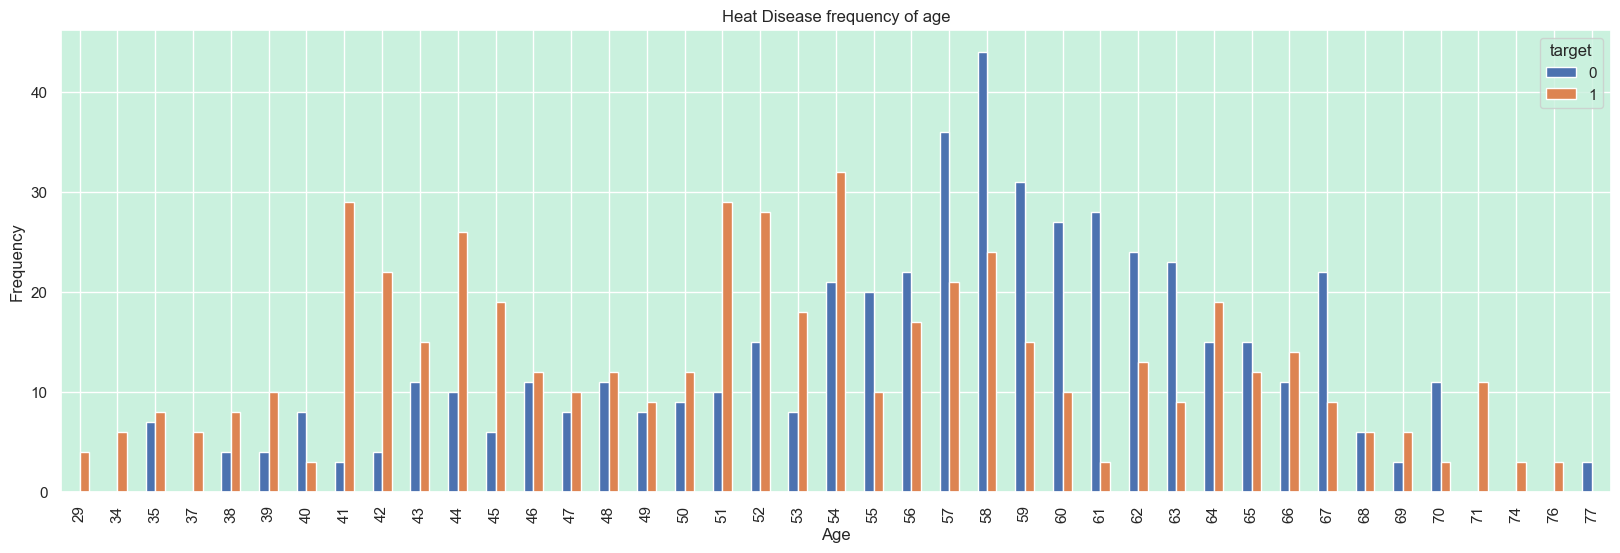

In [7]:
#barplot showing heart disease frequence of age
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heat Disease frequency of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

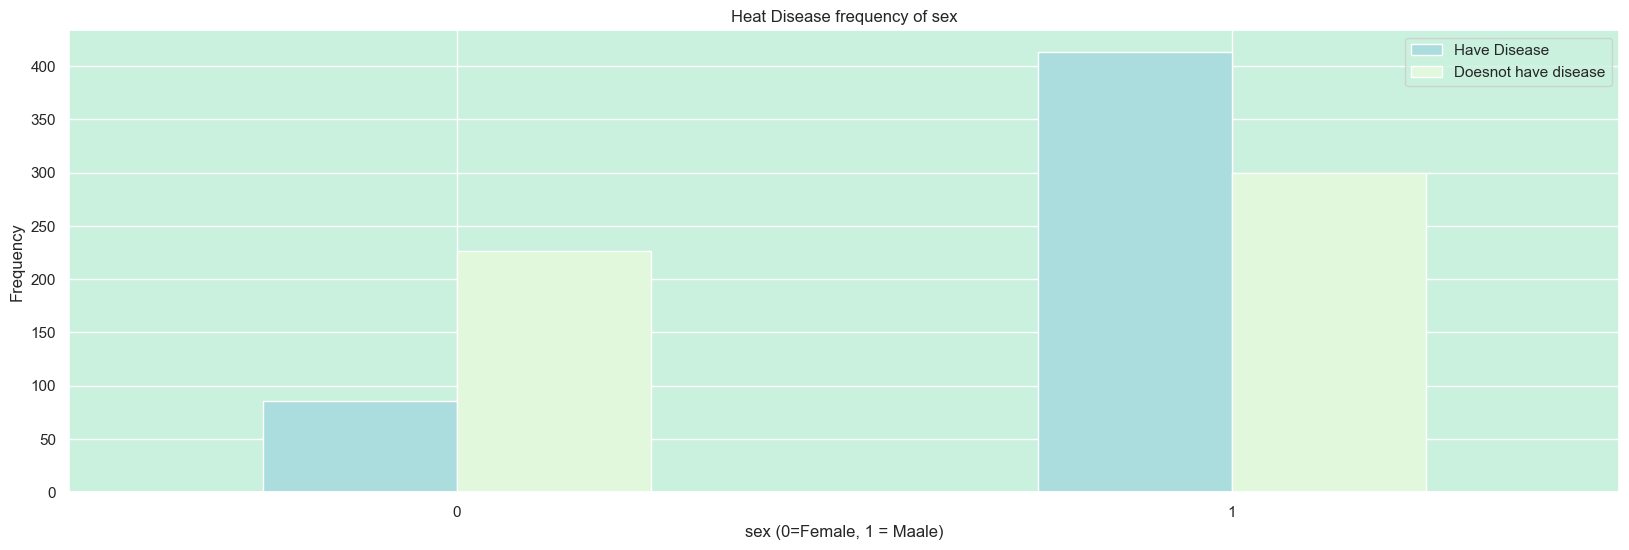

In [12]:
# data visualization of heart disease frequency for sex
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(20,6),color=['#ACDDDE','#E1F8DC'])
plt.title('Heat Disease frequency of sex')
plt.xlabel('sex (0=Female, 1 = Maale)')
plt.legend(['Have Disease', 'Doesnot have disease'])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

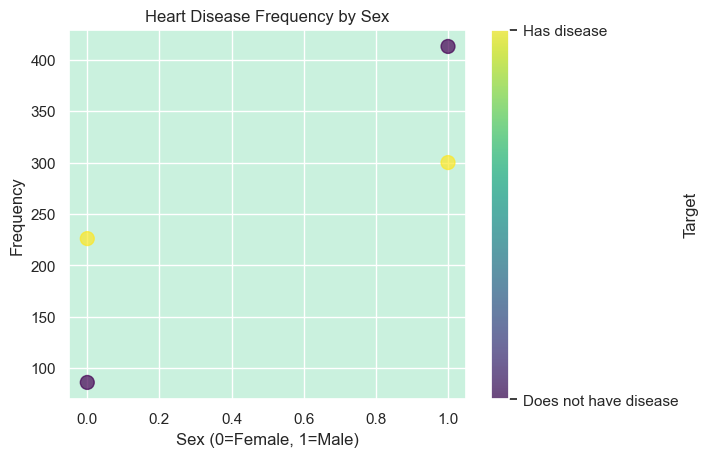

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'sex' and 'target'

# Grouping data by 'sex' and 'target' and counting the occurrences
grouped_data = df.groupby(['sex', 'target']).size().reset_index(name='count')

# Extracting the data for plotting
sex_values = grouped_data['sex']
target_values = grouped_data['target']
counts = grouped_data['count']

# Creating the scatter plot
plt.scatter(sex_values, counts, c=target_values, cmap='viridis', s=100, alpha=0.7)

# Adding title and labels
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Frequency')

# Adding a colorbar to represent 'target' values
color_bar = plt.colorbar()
color_bar.set_label('Target')
color_bar.set_ticks([0, 1])
color_bar.set_ticklabels(['Does not have disease', 'Has disease'])

# Display the plot
plt.show()


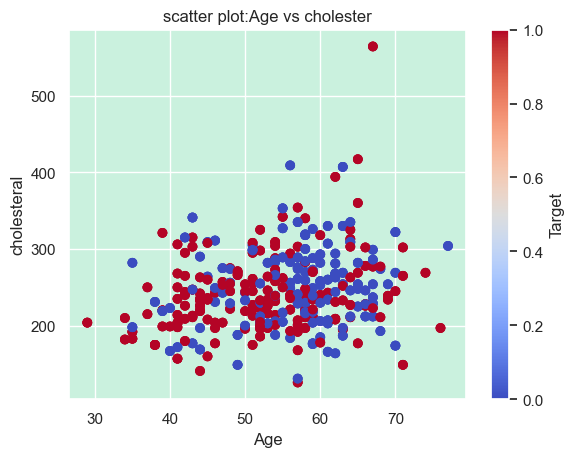

In [14]:
age =df['age']
chol=df['chol']
plt.scatter(age, chol, c=df['target'],cmap ='coolwarm')
plt.xlabel('Age')
plt.ylabel('cholesteral')
plt.title('scatter plot:Age vs cholester')
plt.colorbar(label = 'Target')
plt.show()

In [ ]:
# Working with Ml model Accuracy of different ML more
#create model for logistic regression
# solve problems based on classification, create independent variables and dependent variables
# categorical prediction

In [15]:
#creating a model for logistic regression
y = df.target.values
x_data = df.drop(['target'],axis=1)

In [17]:
#Normalize the data ! split our data for traing and testing 
#80% training #20% testing
# normalize the data x = (x-xmin)/(xmax-xmin)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [18]:
#splite the data 80% training 20% testing
# read about logistic regressing, testing and training, independent variables and dependent variables, decission trees
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [19]:
# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T